# Project Predicting Car Prices 
by Musab Alabdullatif
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------

# Table of Contents
- [contents](#contents)
  - [part 1 data analysis](#part-1-data-analysis)
    - [1.0 goals](#1.0-goals)
    - [1.1 about data](#1.1-about-data)
    - [1.2 QUESTIONS](#1.2-QUESTIONS)
    - [1.3 Preprocess the Data](#1.3-Preprocess-the-Data)
    - [1.4 Exploratory Data Analysis (EDA)](#1.4-Exploratory-Data-Analysis-(EDA))
  - [part 2 build model](#part-2-build-model)
-------------------------------------------------------------------------------------------------------------------------

# 1.0 Goals 
The objective of the project is to identify a proper machine-learning model that predicts the price of a used car based on features like mileage, age, fuel type, and engine size, among others and get good insight from dataset. This model will let us know how these factors affect car prices and give us an efficient way to estimate the value of a used car.

In [1]:
# improt the important library we will use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


-------------------------------------------------------------------------------------------------------------------------

# 1.1 about data 
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data
> We are going to use the `used_cars` dataset. Since car price is a continuous variable, this is a regression problem. The data contains the following columns:


> * '`brand`': The manufacturer or brand name of the vehicle.
> * '`model`': The specific model or trim name of the car.
> * '`model_year`': The year the car model was manufactured or released.
> * '`mileage`': The number of miles the car has been driven.
> * '`fuel_type`': The type of fuel the car uses.
> * '`engine`': Details of the engine's specifications.
> * '`transmission`': The type of transmission the car uses.
> * '`ext_col`': The color of the car's exterior.
> * '`int_col`': The color of the car's interior.
> * '`accident`': Information about whether the car has been involved in an accident or has damage.
> * '`clean_title`': Indicates whether the car has a "clean title" (no major accidents, theft, or significant damage in the history). 
> * '`Price`': The price of the car.



In [2]:
# read dataset 
df=pd.read_csv("used_cars.csv")

df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


---------------------------------------------------------------------------------------------------------------------------

# 1.2  QUESTIONS
### 1- is milage, age, Engine_Displacement and Horsepower effecting on price ?
### 2- What is the average price of cars in the dataset?
### 3- Which brand has the most cars listed in the dataset?
### 4- What is the most common fuel type in the dataset?
### 5- Which car has the lowest price?
### 6- Which model has the highest price?
### 7- What is the most common interior color in the dataset?

# 1.3 Preprocess the Data

In [3]:
df.shape

(4009, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [6]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
# check dataset there is duplicated or not
df.duplicated().sum()

0

In [8]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [9]:
#from the code above we can see that there are 2 missing value in the dataset so we will replace them with  one obkect called not supported
df["fuel_type"]=df["fuel_type"].fillna("not supported")
df["fuel_type"]=df["fuel_type"].replace({"–":"not supported"})

In [10]:
df["clean_title"].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [11]:
# replace the missing value with "No"
df["clean_title"]=df["clean_title"].fillna('No')
df["clean_title"].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [12]:
df["accident"].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [13]:
# replace the missing value with "None reported"
df["accident"]=df['accident'].fillna('None reported')
df["accident"].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [14]:
# chage the data type
df["milage"] = df["milage"].str.replace("mi.","")
df["milage"] = df["milage"].str.replace(",","")
df["milage"] = df["milage"].astype(float)
df["milage"]

0       51000.0
1       34742.0
2       22372.0
3       88900.0
4        9835.0
         ...   
4004      714.0
4005    10900.0
4006     2116.0
4007    33000.0
4008    43000.0
Name: milage, Length: 4009, dtype: float64

In [15]:
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")
df["price"] = df["price"].astype(float)
df["price"]

0        10300.0
1        38005.0
2        54598.0
3        15500.0
4        34999.0
          ...   
4004    349950.0
4005     53900.0
4006     90998.0
4007     62999.0
4008     40000.0
Name: price, Length: 4009, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [17]:
import datetime
now_date = datetime.datetime.now()
df["Age"] = now_date.year - df["model_year"]
df["Age"]= df["Age"] + 1


In [18]:
df.drop("model_year",axis=1,inplace=True)

In [19]:
df['transmission'].value_counts()


transmission
A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
                                                 ... 
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, Length: 62, dtype: int64

In [20]:
transmission_mapping = {
    '6-Speed A/T': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    'Automatic': 'Automatic',
    '7-Speed A/T': 'Automatic',
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Automatic',
    '9-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    'Automatic CVT': 'CVT',
    'CVT Transmission': 'CVT',
    'CVT-F': 'CVT',
    '7-Speed Automatic': 'Automatic',
    '6-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    '6-Speed Manual': 'Manual',
    '5-Speed M/T': 'Manual',
    'Manual': 'Manual',
    '7-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',
    'M/T': 'Manual',
    '6-Speed Automatic with Auto-Shift': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Automatic',
    '9-Speed Automatic with Auto-Shift': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '4-Speed Automatic': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '1-Speed A/T': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '6-Speed Electronically Controlled Automatic with O': 'Automatic',
    'Single-Speed Fixed Gear': 'Automatic',
    '7-Speed DCT Automatic': 'Automatic',
    '8-SPEED AT': 'Automatic',
    '8-SPEED A/T': 'Automatic',
    '10-Speed Automatic with Overdrive': 'Automatic',
    'Automatic, 9-Spd 9G-Tronic': 'Automatic',
    'Automatic, 8-Spd': 'Automatic',
    'Automatic, 8-Spd Sport w/Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd PDK Dual-Clutch': 'Automatic',
    'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd Dual-Clutch': 'Automatic',
    '2-Speed A/T': 'Automatic',
    '6 Speed At/Mt': 'Manual',
    '6 Speed Mt': 'Manual',
    'Variable': 'Other',
    '2': 'Other',
     '–': 'Other',
    'SCHEDULED FOR OR IN PRODUCTION': 'Other'
}


df['transmission'] = df['transmission'].replace(transmission_mapping)

df['transmission'].value_counts()


transmission
Automatic                                3324
Manual                                    372
CVT                                       100
9-Speed A/T                                74
6-Speed Automatic                          73
7-Speed Automatic with Auto-Shift          24
1-Speed Automatic                          14
Other                                      12
Transmission Overdrive Switch               7
F                                           2
Manual, 6-Spd                               2
Auto, 6-Spd w/CmdShft                       1
6-Speed                                     1
Automatic, 10-Spd                           1
7-Speed                                     1
Automatic, 7-Spd S tronic Dual-Clutch       1
Name: count, dtype: int64

In [21]:

def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    else:
        return 'Other'


df['transmission'] = df['transmission'].apply(simplify_transmission)


df['transmission'].value_counts()

transmission
Automatic    3437
Manual        374
Other         198
Name: count, dtype: int64

In [22]:
df["engine"].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
323.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 4.2L 8 Cylinder Engine Gasoline Fuel              1
353.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel              1
420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel             1
Name: count, Length: 1146, dtype: int64

In [23]:
import re

def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''


df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [24]:
df.drop('engine',axis=1,inplace=True)

In [25]:
df['Horsepower'].isna().sum()

707

In [26]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower']=df['Horsepower'].fillna(df['Horsepower'].mean())
df['Horsepower'].isnull().sum()

0

In [27]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')
df['Engine_Displacement']=df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean())
df['Engine_Displacement'].isnull().sum()

0

In [28]:
df.drop("model",axis=1,inplace=True)

In [29]:
df["ext_col"].value_counts()

ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64

In [30]:
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

In [31]:
def extract_base_colors(df):
    
    base_colors = [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
         'orange', 'yellow']
    
    # Convert columns to lowercase for consistency
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()
    
    # Function to find base color or label it as 'other'
    def find_base_color(text):
        for color in base_colors:
            if color in text:
                return color
        return 'other'  # If no base color is found, return 'other'

    # Apply the function to both interior and exterior color columns
    df['int_col'] = df['int_col'].apply(find_base_color)
    df['ext_col'] = df['ext_col'].apply(find_base_color)
    return df


df = extract_base_colors(df)

df[['int_col', 'ext_col']].head()

,int_col,ext_col
0,black,black
1,gray,other
2,black,blue
3,black,black
4,black,white


# 1.4 📊 Exploratory Data Analysis (EDA)


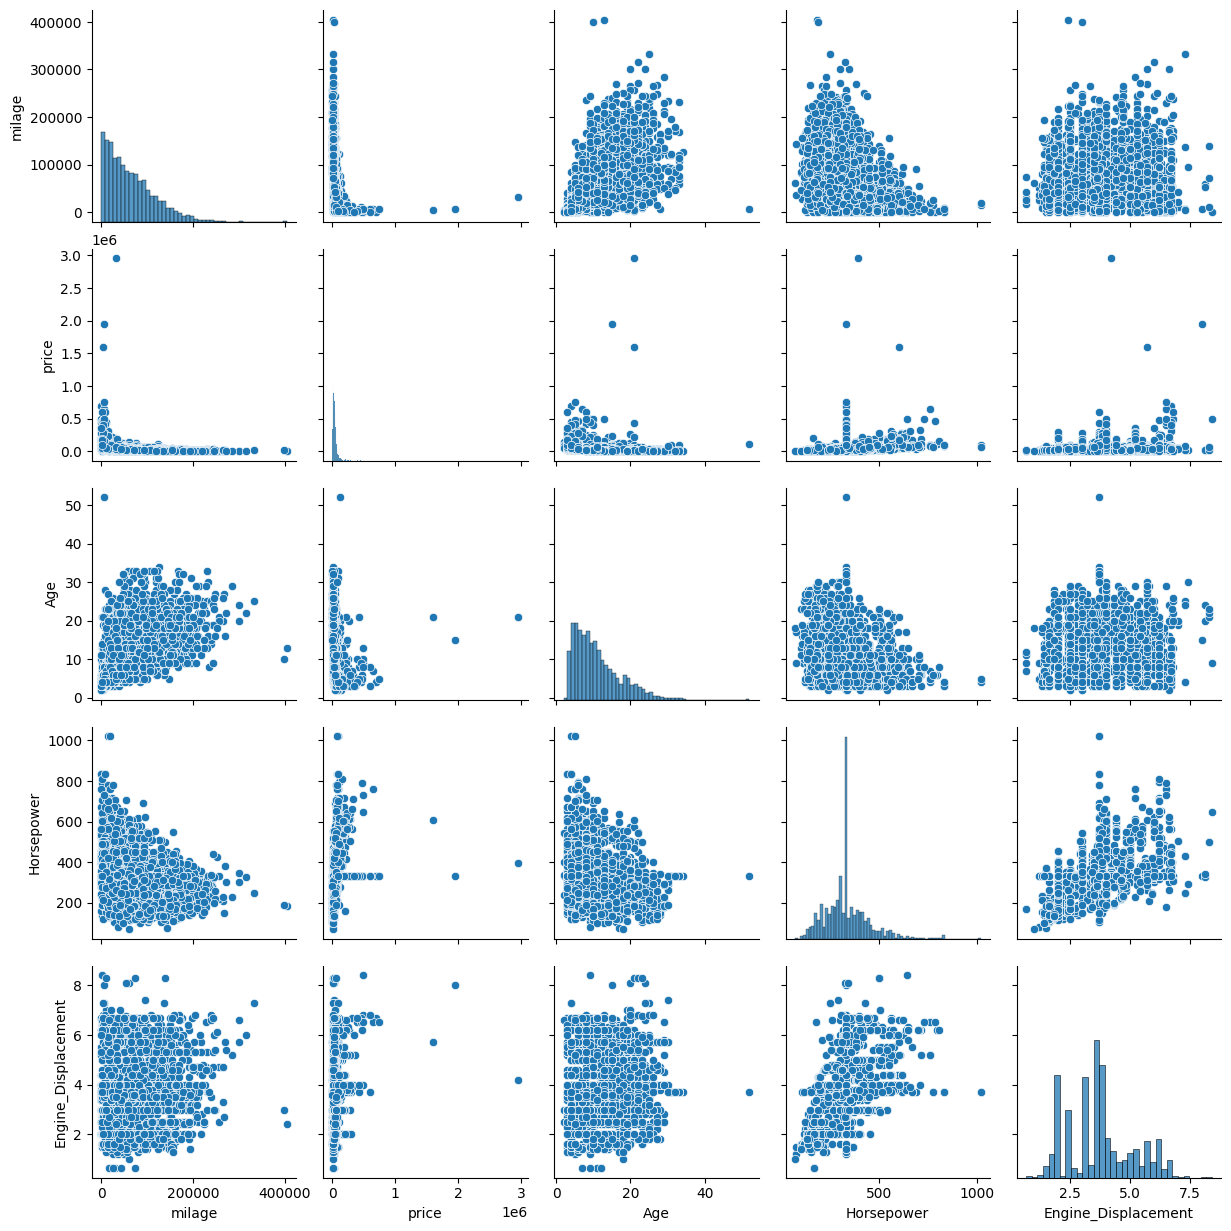

In [32]:
sns.pairplot(df)
plt.show()

### 1- is milage, age, Engine_Displacement and Horsepower effecting on price ?

In [33]:
df_q1=df[["milage","Age","Engine_Displacement","Horsepower","price"]]

In [34]:
df_q1

,milage,Age,Engine_Displacement,Horsepower,price
0,51000.0,13,3.700000,300.000000,10300.0
1,34742.0,5,3.800000,332.283839,38005.0
2,22372.0,4,3.710836,332.283839,54598.0
3,88900.0,11,3.500000,354.000000,15500.0
4,9835.0,5,2.000000,332.283839,34999.0
...,...,...,...,...,...
4004,714.0,3,6.000000,332.283839,349950.0
4005,10900.0,4,3.000000,349.000000,53900.0
4006,2116.0,4,3.710836,332.283839,90998.0
4007,33000.0,6,3.500000,450.000000,62999.0


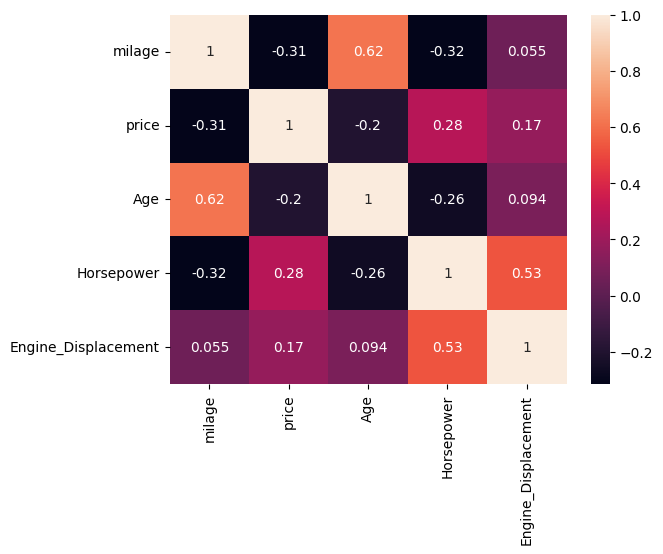

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### 2- What is the average price of cars in the dataset?


In [36]:
print("the avrgae price is ",df["price"].mean())

the avrgae price is  44553.190321776005


### 3- Which brand has the most cars listed in the dataset?


C:\Users\hmmmr\AppData\Local\Temp\ipykernel_4256\2971652627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')


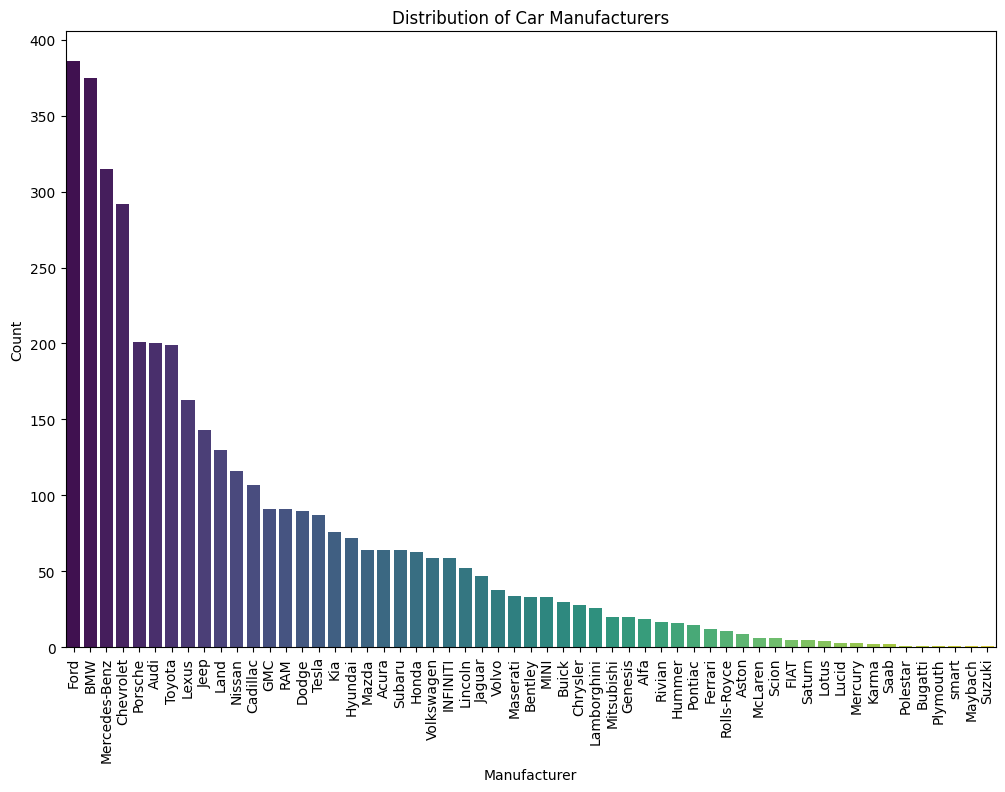

In [37]:

plt.figure(figsize=(12, 8))
brand_counts=df["brand"].value_counts()
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

### 4- What is the most common fuel type in the dataset?


C:\Users\hmmmr\AppData\Local\Temp\ipykernel_4256\1148833196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_type_counts.index, y = fuel_type_counts.values,palette='viridis')


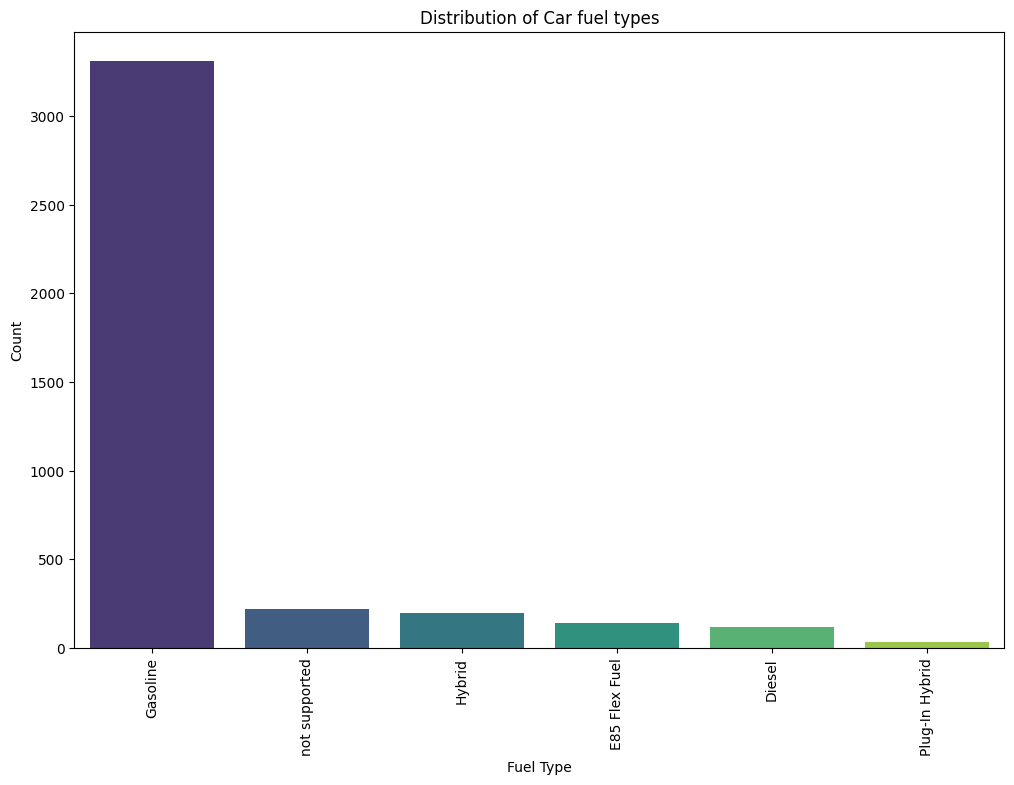

In [38]:
plt.figure(figsize=(12, 8))
fuel_type_counts=df["fuel_type"].value_counts()
sns.barplot(x=fuel_type_counts.index, y = fuel_type_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car fuel types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


### 5- Which car has the lowest price?


In [39]:
df.loc[df['price'].idxmin()]



brand                        Lincoln
milage                      140000.0
fuel_type                   Gasoline
transmission               Automatic
ext_col                        black
int_col                        other
accident               None reported
clean_title                      Yes
price                         2000.0
Age                               21
Horsepower                     302.0
Engine_Displacement              4.6
Name: 425, dtype: object

### 6- Which model has the highest price?


In [40]:
df.loc[df['price'].idxmax()]

brand                                                Maserati
milage                                                32000.0
fuel_type                                            Gasoline
transmission                                        Automatic
ext_col                                                   red
int_col                                                 other
accident               At least 1 accident or damage reported
clean_title                                               Yes
price                                               2954083.0
Age                                                        21
Horsepower                                              394.0
Engine_Displacement                                       4.2
Name: 693, dtype: object

### 7- What is the most common interior color in the dataset?

C:\Users\hmmmr\AppData\Local\Temp\ipykernel_4256\2393317078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interior_counts.index, y = interior_counts.values,palette='viridis')


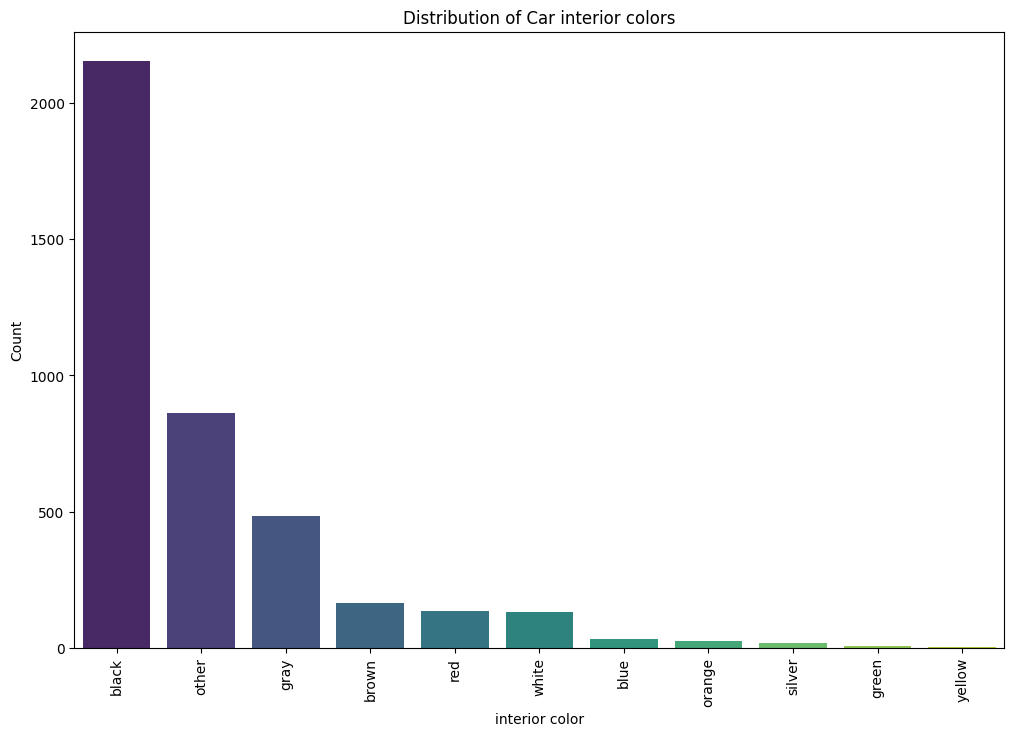

In [41]:

plt.figure(figsize=(12, 8))
interior_counts=df["int_col"].value_counts()
sns.barplot(x=interior_counts.index, y = interior_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car interior colors')
plt.xlabel('interior color')
plt.ylabel('Count')
plt.show()

## part 2 build model 

we will chage every object in dataset with number to can make linear regrssion

In [42]:
df["transmission"] = df["transmission"].replace({'Automatic':1,
                                                'Manual':2,
                                                'Other':3})
df["accident"] = df["accident"].replace({'At least 1 accident or damage reported':1,"None reported":0}) 
df["clean_title"] = df["clean_title"].replace({"Yes":1,"No":0})


C:\Users\hmmmr\AppData\Local\Temp\ipykernel_4256\194821974.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["transmission"] = df["transmission"].replace({'Automatic':1,
C:\Users\hmmmr\AppData\Local\Temp\ipykernel_4256\194821974.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["accident"] = df["accident"].replace({'At least 1 accident or damage reported':1,"None reported":0})
C:\Users\hmmmr\AppData\Local\Temp\ipykernel_4256\194821974.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [43]:
encoder = ce.BinaryEncoder(cols=['brand'])
df['price'] = np.log10(df['price'])
df_binary_encoded = encoder.fit_transform(df)
le = LabelEncoder()
categorical_columns = ['fuel_type', 'ext_col', 'int_col']

for col in categorical_columns:
    df_binary_encoded[col] = le.fit_transform(df_binary_encoded[col])

In [44]:
df_binary_encoded.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement
0,0,0,0,0,0,1,51000.0,1,1,0,0,1,1,4.012837,13,300.000000,3.700000
1,0,0,0,0,1,0,34742.0,2,1,6,3,1,1,4.579841,5,332.283839,3.800000
2,0,0,0,0,1,1,22372.0,2,1,1,0,0,0,4.737177,4,332.283839,3.710836
3,0,0,0,1,0,0,88900.0,3,1,0,0,0,1,4.190332,11,354.000000,3.500000
4,0,0,0,1,0,1,9835.0,2,1,9,0,0,0,4.544056,5,332.283839,2.000000


In [45]:
x = df_binary_encoded.drop("price",axis=1)
y = df_binary_encoded["price"]
x.shape,y.shape

((4009, 16), (4009,))

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [47]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x_train)
x_valid_scaled = scale.transform(x_valid)
x_scaled[:5]

array([[-0.38999463, -0.67426782,  1.2612154 ,  1.0726237 ,  0.99240583,
        -1.19809976, -0.04326517, -0.15052732, -0.37109851, -1.22449177,
         1.26044117,  1.76052033, -2.40636411, -0.40971992, -0.01444222,
        -0.00289096],
       [-0.38999463, -0.67426782,  1.2612154 , -0.9322934 ,  0.99240583,
         0.83465504,  0.46497573, -0.15052732, -0.37109851, -1.22449177,
        -0.81307197, -0.56801389,  0.41556471, -0.07859371, -0.59755958,
        -0.15944925],
       [-0.38999463, -0.67426782, -0.79288598,  1.0726237 ,  0.99240583,
         0.83465504, -0.03666614, -0.15052732, -0.37109851,  1.2199744 ,
         1.26044117, -0.56801389,  0.41556471, -0.24415682, -0.77897916,
        -1.27328932],
       [-0.38999463, -0.67426782, -0.79288598, -0.9322934 , -1.00765229,
         0.83465504,  2.33894521, -1.37081337, -0.37109851, -0.95288442,
        -0.81307197, -0.56801389,  0.41556471,  0.58365871, -0.85154699,
        -0.53072927],
       [-0.38999463,  1.4830902 , -0

In [48]:
x_scaled = pd.DataFrame(x_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 
                'brand_5', 'milage', 'fuel_type', 'transmission', 
                'ext_col', 'int_col', 'accident', 'clean_title', 'Age',"Horsepower","Engine_Displacement"])
x_scaled.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Age,Horsepower,Engine_Displacement
0,-0.389995,-0.674268,1.261215,1.072624,0.992406,-1.198100,-0.043265,-0.150527,-0.371099,-1.224492,1.260441,1.760520,-2.406364,-0.409720,-0.014442,-0.002891
1,-0.389995,-0.674268,1.261215,-0.932293,0.992406,0.834655,0.464976,-0.150527,-0.371099,-1.224492,-0.813072,-0.568014,0.415565,-0.078594,-0.597560,-0.159449
2,-0.389995,-0.674268,-0.792886,1.072624,0.992406,0.834655,-0.036666,-0.150527,-0.371099,1.219974,1.260441,-0.568014,0.415565,-0.244157,-0.778979,-1.273289
3,-0.389995,-0.674268,-0.792886,-0.932293,-1.007652,0.834655,2.338945,-1.370813,-0.371099,-0.952884,-0.813072,-0.568014,0.415565,0.583659,-0.851547,-0.530729
4,-0.389995,1.483090,-0.792886,1.072624,-1.007652,0.834655,-0.628070,-0.150527,-0.371099,-1.224492,1.260441,1.760520,0.415565,-0.409720,2.414005,1.696951


In [48]:
x_valid_scaled = pd.DataFrame(x_valid_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 
                'brand_5', 'milage', 'fuel_type', 'transmission', 
                'ext_col', 'int_col', 'accident', 'clean_title', 'Age',"Horsepower","Engine_Displacement"])

In [ ]:
model = LinearRegression()

model.fit(x_scaled, y_train)

y_valid_pred = model.predict(x_valid_scaled)

mse = mean_squared_error(y_valid, y_valid_pred)
r2 = r2_score(y_valid, y_valid_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.028439655772948172
R-squared: 0.7540195326228423
